In [4]:
# !pip install pygraphviz
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community
from matplotlib import cm
import multiprocessing as mp
from networkx.generators.community import planted_partition_graph
#from myGAM_Multiple_NonOverlapping import *
from avalia import *

In [4]:
G = nx.readwrite.edgelist.read_weighted_edgelist("/home/felipe/UFRJ/TCC/MVP/package4/weighted_directed_nets/network.dat")

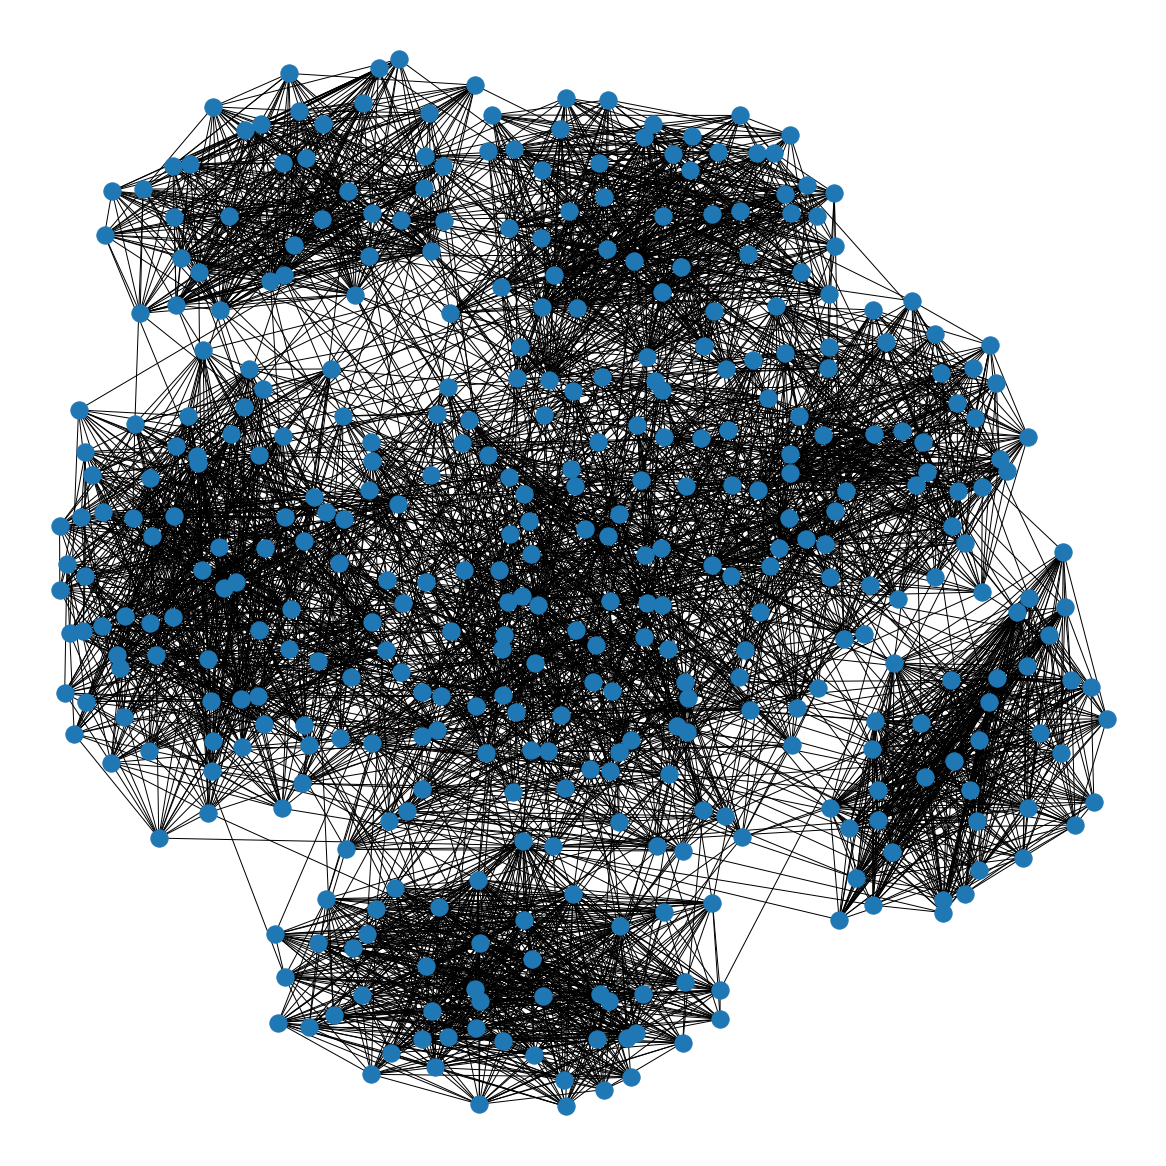

In [5]:
plt.figure(figsize=(16,16))
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G,pos=pos)

In [11]:
def computeNewLabels(f_bar,neighborhood_avg):
	new_labels = np.zeros(neighborhood_avg.shape)
	relative_neighborhood = neighborhood_avg - f_bar[np.newaxis,:]
	for i in range(new_labels.shape[0]):
		indexes = np.argwhere(relative_neighborhood[i,:] == np.amax(relative_neighborhood[i,:]))
		index = np.random.choice(indexes)
		new_labels[i,index] = 1
	print(new_labels.shape)
	return new_labels

def computeNewLabels2(neighborhood_avg,**kwargs):
	f_bar = kwargs["f_bar"]
	new_labels = np.zeros(neighborhood_avg.shape)
	relative_neighborhood = neighborhood_avg - f_bar
	indexes = np.argwhere(relative_neighborhood == np.amax(relative_neighborhood))
	index = np.random.choice(indexes)
	new_labels[index] = 1
	return new_labels


def myGAM(G,k):
    total_cpu = mp.cpu_count()
    pool = mp.Pool(total_cpu)
    V = G.number_of_nodes()
    indexes = np.random.randint(0,k,size=V)
    labels = np.zeros((V,k))
    for index,col in enumerate(indexes):
        labels[index,col] = 1
    t = 0
    HT = {}
    HT[str(labels)] = 0
    D_inv = np.diag([1/G.degree(i) for i in G])
    A = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()
    D_inv_A = np.matmul(D_inv,A)
    while True:
        f = D_inv_A
        f = f.dot(labels)
        f_bar = f.mean(axis=0)
        #f_split = np.array_split(f, total_cpu)
        #labels = np.vstack([pool.apply(computeNewLabels, args=(f_bar,row)) for row in f_split])
        labels = np.apply_along_axis(computeNewLabels2, 1, f,kargs={"fbar":f_bar})
        if str(labels) in HT:
            return labels
        t = t+1
        HT[str(labels)] = t

In [12]:
k = 7
G2 = planted_partition_graph(k,1000,0.7,0.001)
l = myGAM(G2,7)

KeyError: 'f_bar'

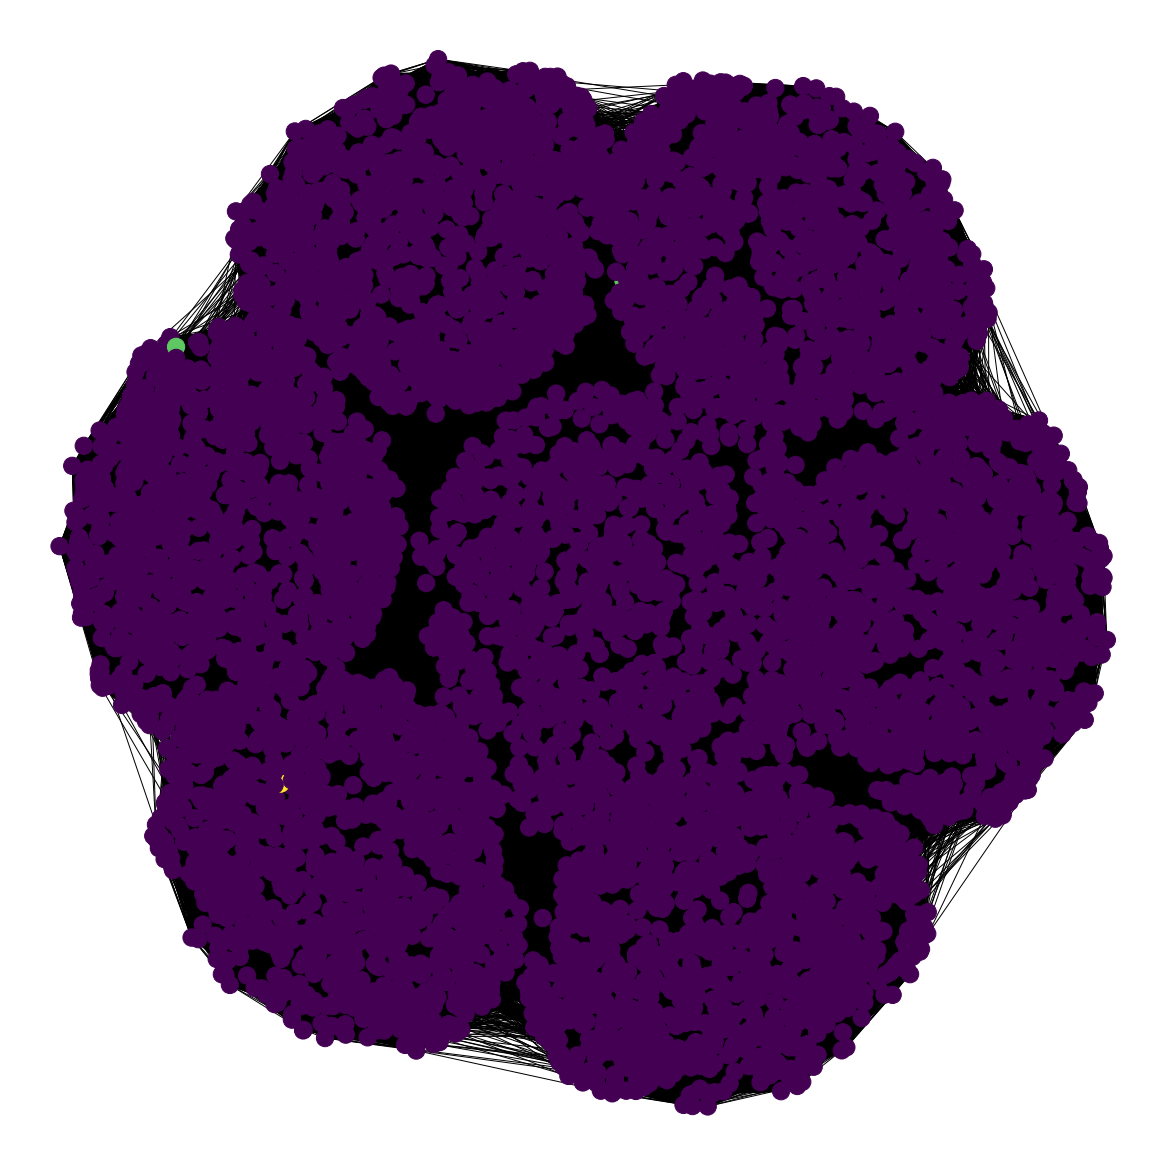

In [5]:
plt.figure(figsize=(16,16))
pos = nx.nx_agraph.graphviz_layout(G2)
nx.draw(G2,pos=pos,node_color=np.argmax(l,axis=1))

In [7]:
b=np.array([[0, 5, 2, 5, 4, 5],[0, 5, 2, 5, 4, 5]])
b.apply(np.random.choice(np.flatnonzero(b))

3

In [3]:
np.sum(l)

0.0

In [4]:
l.shape

(7000, 7)

In [13]:
np.unique(np.argmax(l,axis=1))

array([1, 2, 4, 5, 6])

In [10]:
groundTruth = [(node,data["block"]) for node,data in dict(G2.nodes.data()).items()]
node_belongings = getBelongings(G2)
true_labels = np.array(groundTruth)[:,1]
acc(l,true_labels)

0.5714285714285714

In [11]:
color_map = []
for node in G2:
    index = np.argmax(l[node,:])
    color_map.append(index)
#     if l[int(node),0] == 1:
#         color_map.append("blue")
#     if l[int(node),1] == 1:
#         color_map.append("red")
#     if l[int(node),2] == 1:
#         color_map.append("green")
#     if l[int(node),3] == 1:
#         color_map.append("yellow")
#     if l[int(node),4] == 1:
#         color_map.append("purple")
#     if l[int(node),5] == 1:
#         color_map.append("pink")
#     if l[int(node),6] == 1:
#         color_map.append("white")

In [12]:
l.dtype

dtype('float64')

In [14]:
np.unique(color_map)

array([0, 1, 4, 5, 6])

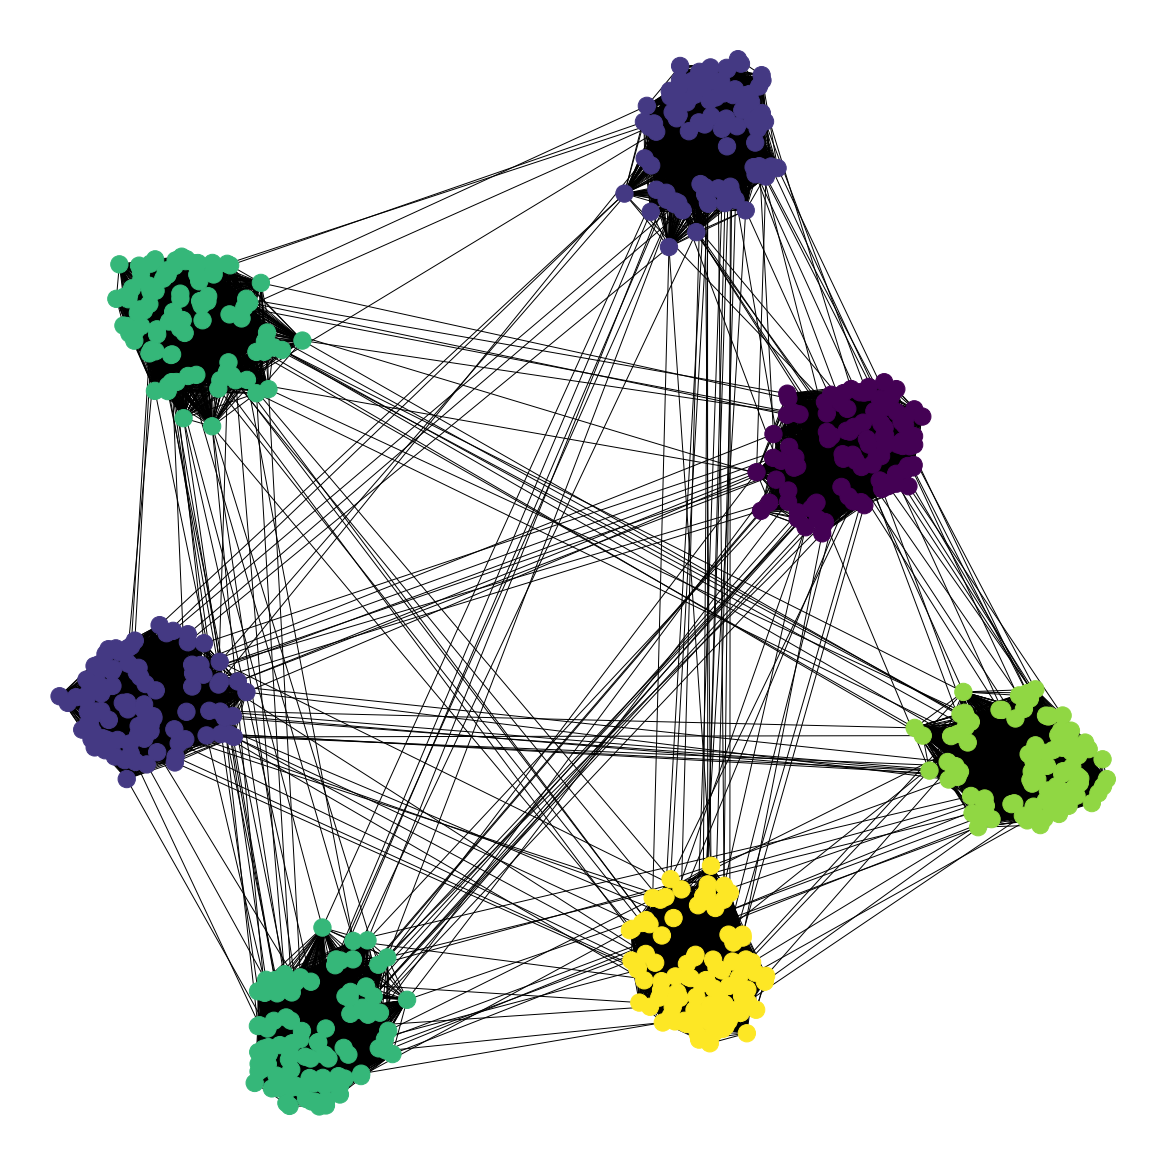

In [15]:
plt.figure(figsize=(16,16))
nx.draw(G2, node_color=color_map)

In [16]:
len(color_map)

700

In [17]:
len(G2)

700

In [21]:
#G = nx.readwrite.edgelist.read_weighted_edgelist("/home/felipe/UFRJ/TCC/MVP/package1/binary_networks/network.dat",nodetype=int)
d,a,l,f = myGAM(G2,len(G2))

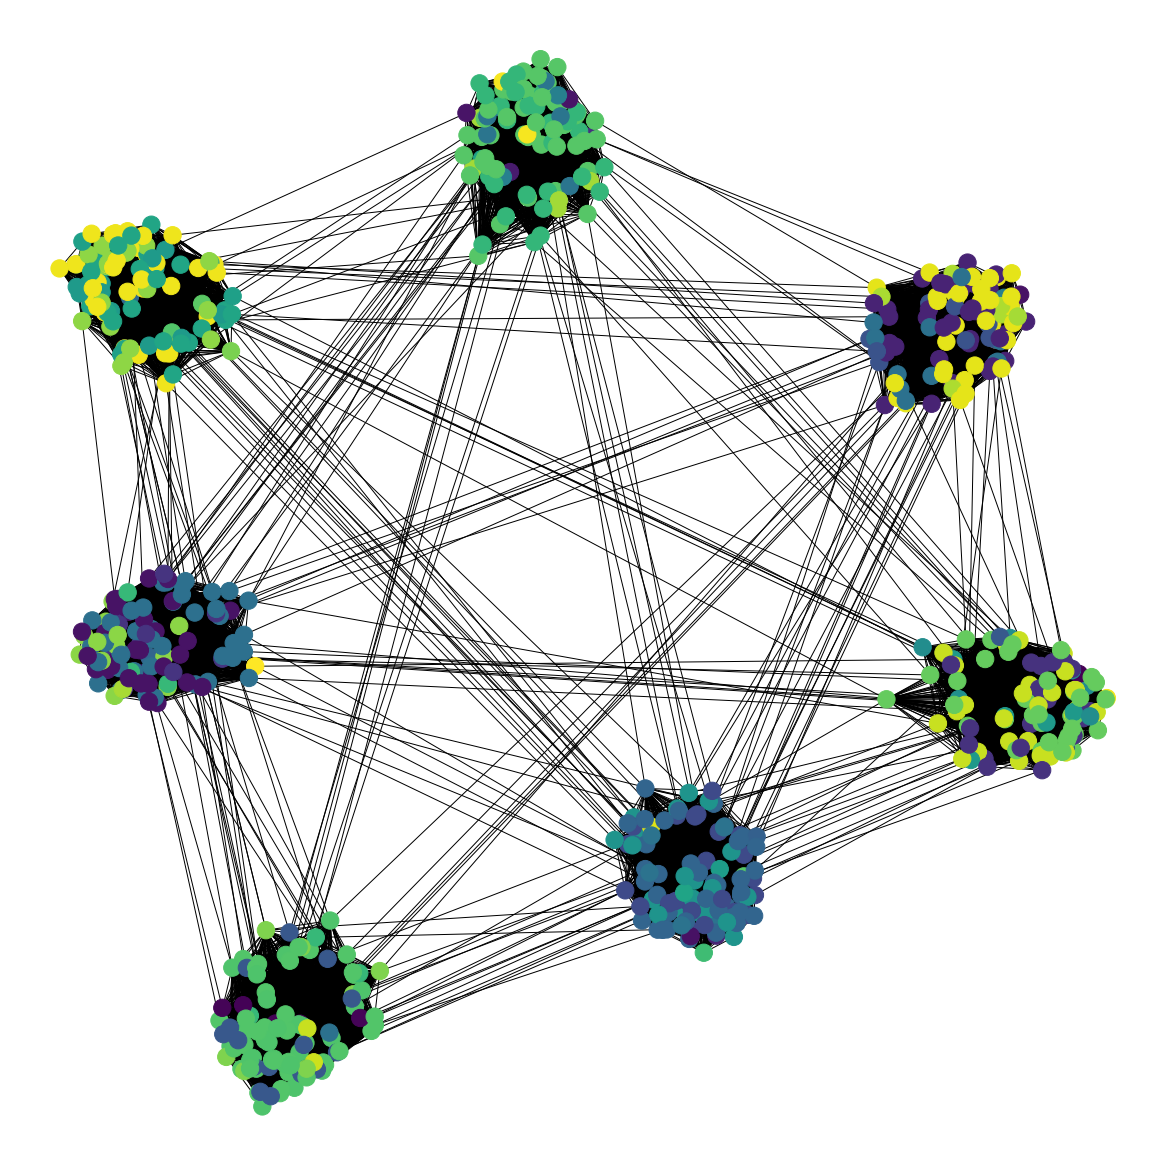

In [22]:
color_map = []
for node in G2:
    index = np.argmax(l[node-1,:])
    color_map.append(index)
plt.figure(figsize=(16,16))
nx.draw(G2, node_color=color_map)